In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.5.0'

In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers
import math

%matplotlib inline

In [3]:
h5f = h5py.File('/content/drive/MyDrive/Colab Notebooks/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5','r')
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
# load the already splited train, validation and test data
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]

X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

print(f'Size of X_train is {X_train.shape}')
print(f'Size of y_train is {y_train.shape}\n')

print(f'Size of X_val is {X_val.shape}')
print(f'Size of y_val is {y_val.shape}\n')

print(f'Size of X_test is {X_test.shape}')
print(f'Size of y_test is {y_test.shape}')

Size of X_train is (42000, 32, 32)
Size of y_train is (42000,)

Size of X_val is (60000, 32, 32)
Size of y_val is (60000,)

Size of X_test is (18000, 32, 32)
Size of y_test is (18000,)


The training dataset(X_train) has 42000 records on which we can train upon of matrix size of 32x32 i.e. image size of 32x32.

The test dataset(X_test) has 18000 records each record being 32x32 in size.

y_train, y_test contain label for the given image matrix.

Label for the image is 6


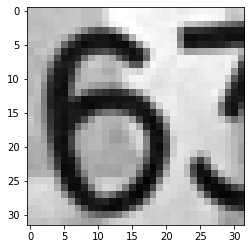

In [5]:
plt.imshow(X_train[1],cmap='gray')
print(f'Label for the image is {y_train[1]}')

Label for the image is 7


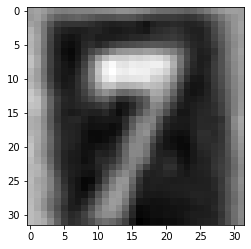

In [6]:
plt.imshow(X_train[2],cmap='gray')
print(f'Label for the image is {y_train[2]}')

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


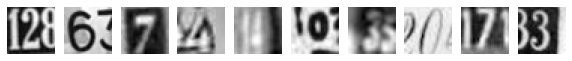

In [7]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % ((y_train[i])))
plt.show()

**Reshaping the data**

In [8]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print(f'Size of X_train is {X_train.shape}')

print(f'Size of X_val is {X_val.shape}')

print(f'Size of X_test is {X_test.shape}')

Size of X_train is (42000, 1024)
Size of X_val is (60000, 1024)
Size of X_test is (18000, 1024)


In [9]:
print(f'Min value for Train = {X_train.min()}, Validation ={X_val.min()}, Test = {X_test.min()} ')
print(f'Max value for Train = {X_train.max()}, Validation ={X_val.max()}, Test = {X_test.max()} ')

Min value for Train = 0.0, Validation =0.0, Test = 0.0 
Max value for Train = 254.97450256347656, Validation =254.97450256347656, Test = 254.97450256347656 


**Normalizing the data**

In [10]:
print('Before Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}\n')
maxVal=X_train.max()
X_train = X_train/maxVal
X_val= X_val/maxVal
X_test = X_test/maxVal

print('After Normalization')
print(f'Min value is {X_train.min()}')
print(f'Max value is {X_train.max()}')

Before Normalization
Min value is 0.0
Max value is 254.97450256347656

After Normalization
Min value is 0.0
Max value is 1.0


**Converting y data into categorical (one-hot encoding)**

In [11]:
print(f'Sample value before one hot encode {y_train[0]}\n')

Sample value before one hot encode 2



In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(f'Size of y_train is {y_train.shape}\n')

print(f'Size of y_val is {y_val.shape}\n')

print(f'Size of y_test is {y_test.shape}')

Size of y_train is (42000, 10)

Size of y_val is (60000, 10)

Size of y_test is (18000, 10)


In [13]:
print(f'Sample value after one hot encode {y_train[0]}')

Sample value after one hot encode [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


Label for image at index 1 is 2
Label for image at index 2 is 6
Label for image at index 3 is 7
Label for image at index 4 is 4
Label for image at index 5 is 4
Label for image at index 6 is 0
Label for image at index 7 is 3
Label for image at index 8 is 0
Label for image at index 9 is 7
Label for image at index 10 is 3


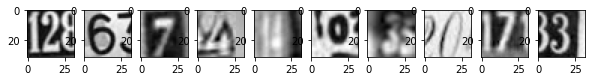

In [14]:
#cross check if all right
plt.figure(figsize=(10,1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    print(f'Label for image at index {i+1} is {np.argmax(y_train[0:10][i])}')

Basic NN model

Naive MLP model without any alterations

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers

In [16]:
model1 = Sequential()
model1.add(Dense(50, input_shape = (1024, )))
model1.add(Activation('sigmoid'))
model1.add(Dense(50))
model1.add(Activation('sigmoid'))
model1.add(Dense(50))
model1.add(Activation('sigmoid'))
model1.add(Dense(50))
model1.add(Activation('sigmoid'))
model1.add(Dense(10))
model1.add(Activation('softmax'))

In [17]:
sgd = optimizers.SGD(learning_rate = 0.01)
model1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
res1 = model1.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 2s 4ms/step - loss: 2.3206 - accuracy: 0.0965
Epoch 2/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3029 - accuracy: 0.0994
Epoch 3/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 4/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3029 - accuracy: 0.0983
Epoch 5/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3029 - accuracy: 0.0973
Epoch 6/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3028 - accuracy: 0.0999
Epoch 7/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3028 - accuracy: 0.0992
Epoch 8/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3029 - accuracy: 0.0994
Epoch 9/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3029 - accuracy: 0.0990
Epoch 10/100
210/210 [==============================] - 1s 4ms/step - loss: 2.3028 - accura

In [19]:
results1 = model1.evaluate(X_test, y_test)

563/563 [==============================] - 1s 1ms/step - loss: 2.3028 - accuracy: 0.0955


In [20]:
print('Test accuracy: ', results1[1])

Test accuracy:  0.09549999982118607


Model with a flatten layer followed by dense layers with activation as ReLu and softmax. 

Used Dropout and batch normalization techniques too.

In [32]:
def model(iterations, lr, Lambda, verb=0, eval_test=False):
    scores=[]
    learning_rate=lr
    hidden_nodes=256
    output_nodes=10
    iterations=iterations
    # For early stopping of model.
    callbacks=tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    #model
    model = Sequential()
    model.add(Dense(500, input_shape=(1024,), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    # adam optmizer with custom learning rate
    adam= optimizers.Adam(lr=learning_rate)
    #Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    #Fit the model
    model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=iterations,
              batch_size=500, verbose=verb, callbacks=[callbacks])
    
    model.save("model_part2.h5") #using h5 extension
    
    if eval_test == True:
        score = model.evaluate(X_train,y_train, verbose=0)
        scores.append(score)
        score = model.evaluate(X_val,y_val, verbose=0)
        scores.append(score)
        score = model.evaluate(X_test,y_test, verbose=0)
        scores.append(score)
        return scores
    else:
        score = model.evaluate(X_val,y_val, verbose=(verb+1)%2)
        return score

In [22]:
iterations = 1
learning_rate=0.0001
Lambda=0
score=model(iterations, learning_rate, Lambda)
print(f'\nLoss is {score[0]} and Accuracy is {score[1]}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1875/1875 [==============================] - 7s 4ms/step - loss: 2.2975 - accuracy: 0.1395

Loss is 2.297454595565796 and Accuracy is 0.13948333263397217


Loss is pretty resonable and so is the accuracy which is probability of being a certain digit among 10 classes is 10%(equal for all classes).

Loss is here calculated via the softmax and crossentropy which is basically -y.ln(0.10) .

In [23]:
iterations = 1
lr=1e3
Lambda=0
score=model(iterations, lr, Lambda)
print(f'\nLoss is {score[0]} and Accuracy is {score[1]}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.1000

Loss is nan and Accuracy is 0.10000000149011612


Loss became too high by increasing learning rate

In [24]:
iterations = 50
lr=1e-4
Lambda=1e-7
score=model(iterations, lr, Lambda)
print(f'Loss is {score[0]} and Accuracy is {score[1]}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1875/1875 [==============================] - 7s 4ms/step - loss: 0.5159 - accuracy: 0.8423
Loss is 0.5159196853637695 and Accuracy is 0.8423333168029785


Got 80% accuracy here

In [25]:
iterations = 10
lr=2
Lambda=1e-2
score=model(iterations, lr, Lambda)
print(f'Loss is {score[0]} and Accuracy is {score[1]}')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1875/1875 [==============================] - 7s 4ms/step - loss: 5344.6333 - accuracy: 0.1000
Loss is 5344.63330078125 and Accuracy is 0.10000000149011612


Loss is too high as Learning rate=2 is too high for model.

In [26]:
import math
results =[]
for i in range(10):
    lr=math.pow(10, np.random.uniform(-4.0,1.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    iterations = 30
    score=model(iterations, lr, Lambda)
    result=f'Loss is {score[0]} and Accuracy is {score[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append(result)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1875/1875 [==============================] - 7s 4ms/step - loss: 2.3032 - accuracy: 0.1000
Loss is 2.3031857013702393 and Accuracy is 0.10000000149011612 with learing rate 0.033371487087318706 and Lambda 3.3031815129439804e-06

1875/1875 [==============================] - 7s 4ms/step - loss: 0.6743 - accuracy: 0.8029
Loss is 0.6743419766426086 and Accuracy is 0.8029000163078308 with learing rate 0.0014142215311209623 and Lambda 0.0018823067161540007

1875/1875 [==============================] - 8s 4ms/step - loss: 2.3381 - accuracy: 0.1000
Loss is 2.3381247520446777 and Accuracy is 0.10000000149011612 with learing rate 0.4120157230640661 and Lambda 1.3789194189993542e-06

1875/1875 [==============================] - 7s 4ms/step - loss: 5.4852 - accuracy: 0.1000
Loss is 5.4852213859558105 and Accuracy is 0.10000000149011612 with learing rate 0.12475062580837352 and Lambda 0.008962414107541053

1875/1875 [==============================] - 7s 4ms/step - loss: 2.9778 - accuracy: 0.1000
Los

As we see, we got good results in range

*  Learning Rate = "0.008 to 0.002"
*  Lambda = 1e-3 to 1e-5

Thus, now we will narrow down the range even more.

In [27]:
import math
results =[]
for i in range(20):
    lr=math.pow(10, np.random.uniform(-4.0,-2.0))
    Lambda = math.pow(10, np.random.uniform(-5,-3))
    iterations = 50
    score=model(iterations, lr, Lambda)
    result=f'Loss is {score[0]} and Accuracy is {score[1]} with learing rate {lr} and Lambda {Lambda}\n'
    print(result)
    results.append([result,[score[0],score[1],lr,Lambda]])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5152 - accuracy: 0.8460
Loss is 0.5151678323745728 and Accuracy is 0.8460333347320557 with learing rate 0.00014988269101958503 and Lambda 7.697140904933861e-05

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4877 - accuracy: 0.8487
Loss is 0.48770657181739807 and Accuracy is 0.848716676235199 with learing rate 0.00016536619045523659 and Lambda 2.3578575155143293e-05

1875/1875 [==============================] - 8s 4ms/step - loss: 0.8580 - accuracy: 0.7424
Loss is 0.858003556728363 and Accuracy is 0.7424166798591614 with learing rate 0.008101662429729341 and Lambda 0.00017158058584426753

1875/1875 [==============================] - 8s 4ms/step - loss: 0.8019 - accuracy: 0.7665
Loss is 0.8019396066665649 and Accuracy is 0.7664666771888733 with learing rate 0.006186861571279966 and Lambda 0.0003038218880563168

1875/1875 [==============================] - 7s 4ms/step - loss: 0.7389 - accuracy: 0.7758


AS we saw, the Loss is 0.407978355884552 and Accuracy is 0.880050003528595 with learing rate 0.0006596189432743647 and Lambda 0.0007730854429022888

So, now we will use these values of LR and lambda


In [44]:
def model_new(iterations, lr, Lambda, verb=0, eval_test=False):
    scores=[]
    learning_rate=lr
    hidden_nodes=256
    output_nodes=10
    iterations=iterations
    # For early stopping of model.
    callbacks=tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    #model
    model = Sequential()
    model.add(Dense(500, input_shape=(1024,), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(hidden_nodes,activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    # adam optmizer with custom learning rate
    adam= optimizers.Adam(lr=learning_rate)
    #Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    #Fit the model
    history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=iterations,
              batch_size=500, verbose=verb, callbacks=[callbacks])
    
    model.save("model_part2.h5") #using h5 extension

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    if eval_test == True:
        score = model.evaluate(X_train,y_train, verbose=0)
        scores.append(score)
        score = model.evaluate(X_val,y_val, verbose=0)
        scores.append(score)
        score = model.evaluate(X_test,y_test, verbose=0)
        scores.append(score)
        return scores
    else:
        score = model.evaluate(X_val,y_val, verbose=(verb+1)%2)
        return score

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


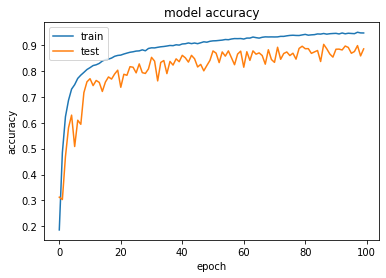

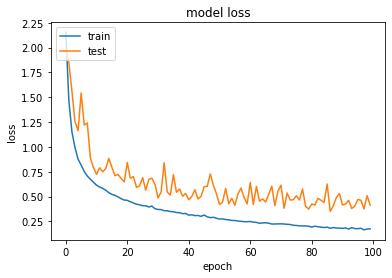

In [45]:
lr= 0.00066
Lambda= 0.00077
iterations = 100 #Since we have used early stopping so it will halt 
eval_test= True
scores = model_new(iterations, lr, Lambda,verb=0, eval_test=True)

In [46]:
print(f'Training Dataset Loss is {scores[0][0]} Accuracy is {scores[0][1]}\n')
print(f'Validation Dataset Loss is {scores[1][0]} Accuracy is {scores[1][1]}\n')
print(f'Test Dataset Loss is {scores[2][0]} Accuracy is {scores[2][1]}\n')

Training Dataset Loss is 0.292623370885849 Accuracy is 0.9084047675132751

Validation Dataset Loss is 0.41390523314476013 Accuracy is 0.8847000002861023

Test Dataset Loss is 0.6968947052955627 Accuracy is 0.8293889164924622



**Observations**
* 1. From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs.
* 2. We can also see that the model has a bit over-learned the training dataset, showing almost comparable value on both datasets.
* 3. From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test). 
* 4. If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.